<a href="https://colab.research.google.com/github/mahekkaul/battery-drain-optimization/blob/main/battery_drain_advisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Battery Drain Optimization Advisor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Load data
df = pd.read_csv('/content/Mobile_User_Behavior_Dataset.csv')


In [ ]:
#Dropping the irrelevant columns
df = df.drop(columns=["User ID", "Device Model", "Operating System", "Gender", "User Behavior Class"])

In [ ]:
#Features and Targets
X = df.drop(columns=["Battery Drain (mAh/day)"])
y = df["Battery Drain (mAh/day)"]

In [ ]:
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [ ]:
#Evaluating

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print("\nModel Evaluation:")
    print("R2 Score:", r2)
    print("RMSE:", rmse)
    print("\nInterpretation:")
    if r2 > 0.9:
        print(" Excellent performance. The model explains most of the variance in battery drain.")
    elif r2 > 0.75:
        print(" Good performance, but there’s still room for improvement.")
    else:
        print("The model may need better tuning or features.")
    print(f"🔍 Average error of ~{int(rmse)} mAh/day could be acceptable based on the use case.")

evaluate_model(y_test, y_pred_rf)


Model Evaluation:
R2 Score: 0.9506633918775276
RMSE: 174.97544753887206

Interpretation:
 Excellent performance. The model explains most of the variance in battery drain.
🔍 Average error of ~174 mAh/day could be acceptable based on the use case.


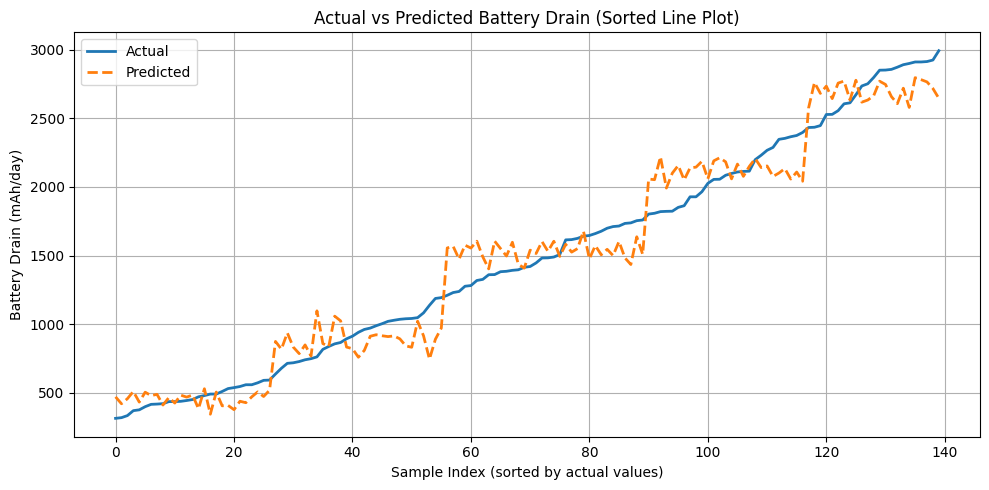

In [ ]:
#Actual VS Predicted

def plot_sorted_predictions(y_true, y_pred):
    sorted_idx = np.argsort(y_true)
    y_true_sorted = np.array(y_true)[sorted_idx]
    y_pred_sorted = np.array(y_pred)[sorted_idx]

    plt.figure(figsize=(10, 5))
    plt.plot(y_true_sorted, label='Actual', linewidth=2)
    plt.plot(y_pred_sorted, label='Predicted', linestyle='--', linewidth=2)
    plt.xlabel("Sample Index (sorted by actual values)")
    plt.ylabel("Battery Drain (mAh/day)")
    plt.title("Actual vs Predicted Battery Drain (Sorted Line Plot)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_sorted_predictions(y_test, y_pred_rf)

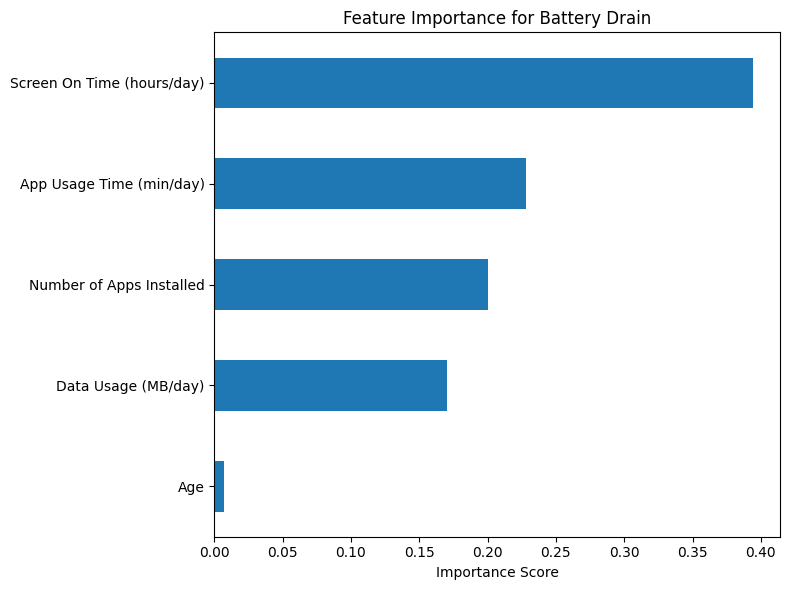

In [ ]:
#Feature Importance
feat_importance = pd.Series(rf_model.feature_importances_, index = X.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(8, 6), title='Feature Importance for Battery Drain')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

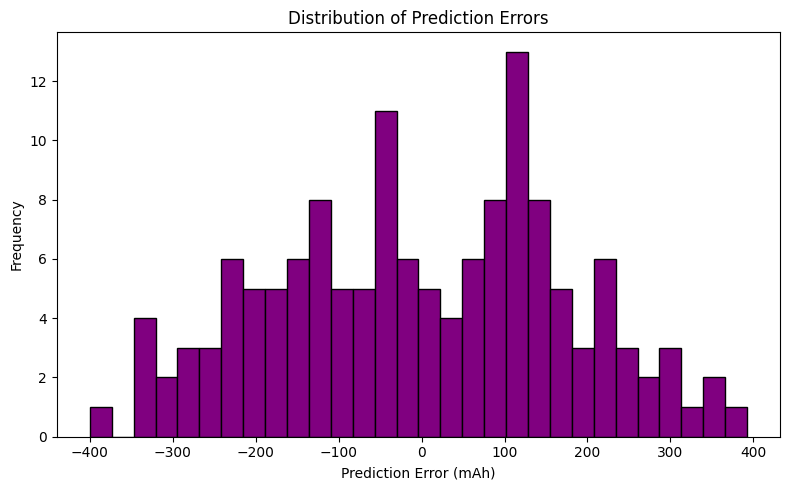

 Interpretation:
- Most errors are centered around 0, which means the model is not biased.
- The distribution is fairly symmetrical, showing balanced predictions.
- Most predictions are within ±100–200 mAh, which is quite accurate.
 This is a strong error distribution for a regression model.


In [ ]:
##Error Distribution
errors = y_test - y_pred_rf
plt.figure(figsize=(8,5))
plt.hist(errors, bins=30, color='purple', edgecolor='black')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error (mAh)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Interpretation of Error Distribution
print(" Interpretation:")
print("- Most errors are centered around 0, which means the model is not biased.")
print("- The distribution is fairly symmetrical, showing balanced predictions.")
print("- Most predictions are within ±100–200 mAh, which is quite accurate.")
print(" This is a strong error distribution for a regression model.")



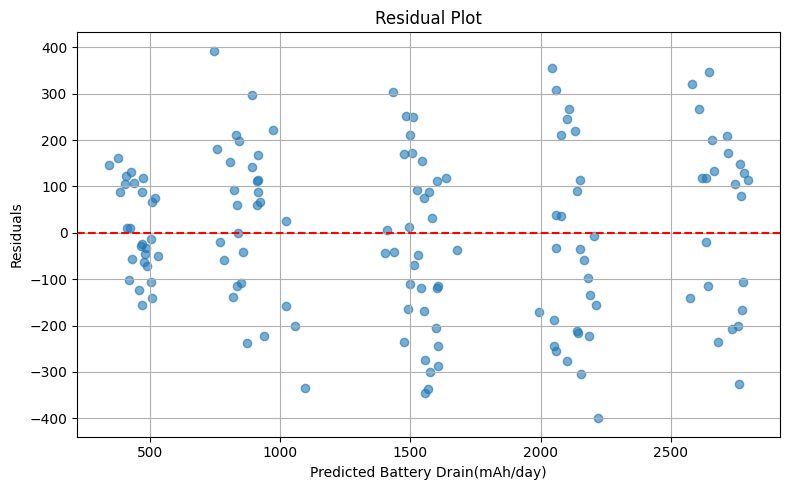

 Interpretation:
- Residuals are centered around 0 → No bias in predictions.
- The spread is even → Model performs consistently across all values.
 This indicates a reliable and well-fitted regression model.


In [ ]:
##Residual Plot
residuals = y_test - y_pred_rf
plt.figure(figsize=(8,5))
plt.scatter(y_pred_rf, residuals, alpha=0.6)
plt.axhline(0,color='red', linestyle='--')
plt.xlabel("Predicted Battery Drain(mAh/day)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretation of Residual Plot
print(" Interpretation:")
print("- Residuals are centered around 0 → No bias in predictions.")
print("- The spread is even → Model performs consistently across all values.")
print(" This indicates a reliable and well-fitted regression model.")

In [ ]:
# Advisor Output
from IPython.display import Markdown, display

def show_prediction_output(prediction, tips):
    display(Markdown(f"### \U0001F50B Predicted Battery Drain: `{int(prediction)} mAh/day`"))
    display(Markdown("### \U0001F4A1 Recommendations:"))
    for tip in tips:
        display(Markdown(f"- {tip}"))

def recommend_tips(app_time, screen_time, num_apps, data_usage, age):
    prediction = rf_model.predict([[app_time, screen_time, num_apps, data_usage, age]])[0]
    tips = []
    if app_time > 300:
        tips.append("Reduce app usage below 5 hours/day.")
    if screen_time > 5:
        tips.append("Lower screen-on time or enable battery saver mode.")
    if num_apps > 50:
        tips.append("Uninstall unused apps to reduce background drain.")
    if data_usage > 1000:
        tips.append("Use Wi-Fi instead of mobile data when possible.")

    if not tips:
        tips.append("✅ Your mobile usage is efficient. No action needed!")

    show_prediction_output(prediction, tips)





In [ ]:
recommend_tips(app_time=4, screen_time=1, num_apps=8, data_usage=120, age=25)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### 🔋 Predicted Battery Drain: `529 mAh/day`

### 💡 Recommendations:

- ✅ Your mobile usage is efficient. No action needed!